In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/acer/Downloads/netflix_titles.csv.zip")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
print(colored("There are {} rows and {} columns in the dataset.".format(df.shape[0],df.shape[1]),attrs=['bold']))

There are 6234 rows and 12 columns in the dataset.


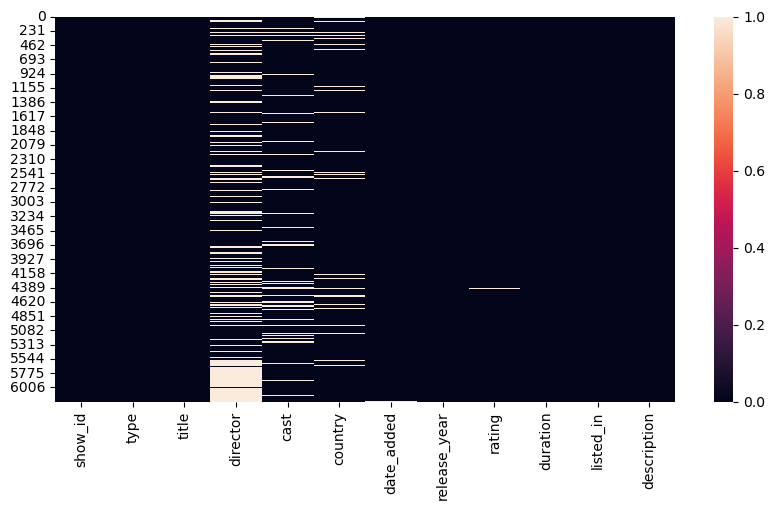

director's null rate :31.58%
cast's null rate :9.14%
country's null rate :7.64%
date_added's null rate :0.18%
rating's null rate :0.16%


In [4]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

In [5]:
df.drop(['director'],axis = 1,inplace = True)
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
df['country'].replace(np.nan, 'United States',inplace  = True)

df['cast'].replace(np.nan, 'No Data',inplace  = True)

print(colored(
"I will drop the missing rows from the columns 'date_added' and 'rating' since these have only {} missing rows in total.".
    format(df.isnull().sum().sum()),attrs=['bold']))

I will drop the missing rows from the columns 'date_added' and 'rating' since these have only 21 missing rows in total.


In [7]:
df.dropna(inplace=True)

print(colored("There are {} rows and {} columns after handling the missing records in the dataset.".format(
    df.shape[0],df.shape[1]),attrs=['bold']))

There are 6214 rows and 11 columns after handling the missing records in the dataset.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6214 entries, 0 to 6222
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6214 non-null   int64 
 1   type          6214 non-null   object
 2   title         6214 non-null   object
 3   cast          6214 non-null   object
 4   country       6214 non-null   object
 5   date_added    6214 non-null   object
 6   release_year  6214 non-null   int64 
 7   rating        6214 non-null   object
 8   duration      6214 non-null   object
 9   listed_in     6214 non-null   object
 10  description   6214 non-null   object
dtypes: int64(2), object(9)
memory usage: 582.6+ KB


In [9]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


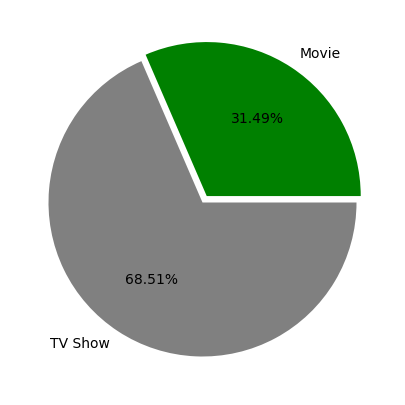

In [10]:
plt.figure(figsize=(10,5))
plt.pie(df['type'].value_counts().sort_values(),labels=df['type'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',colors=['Green','grey'])
plt.show()

In [11]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)

In [12]:
top20country = country_count.head(20)

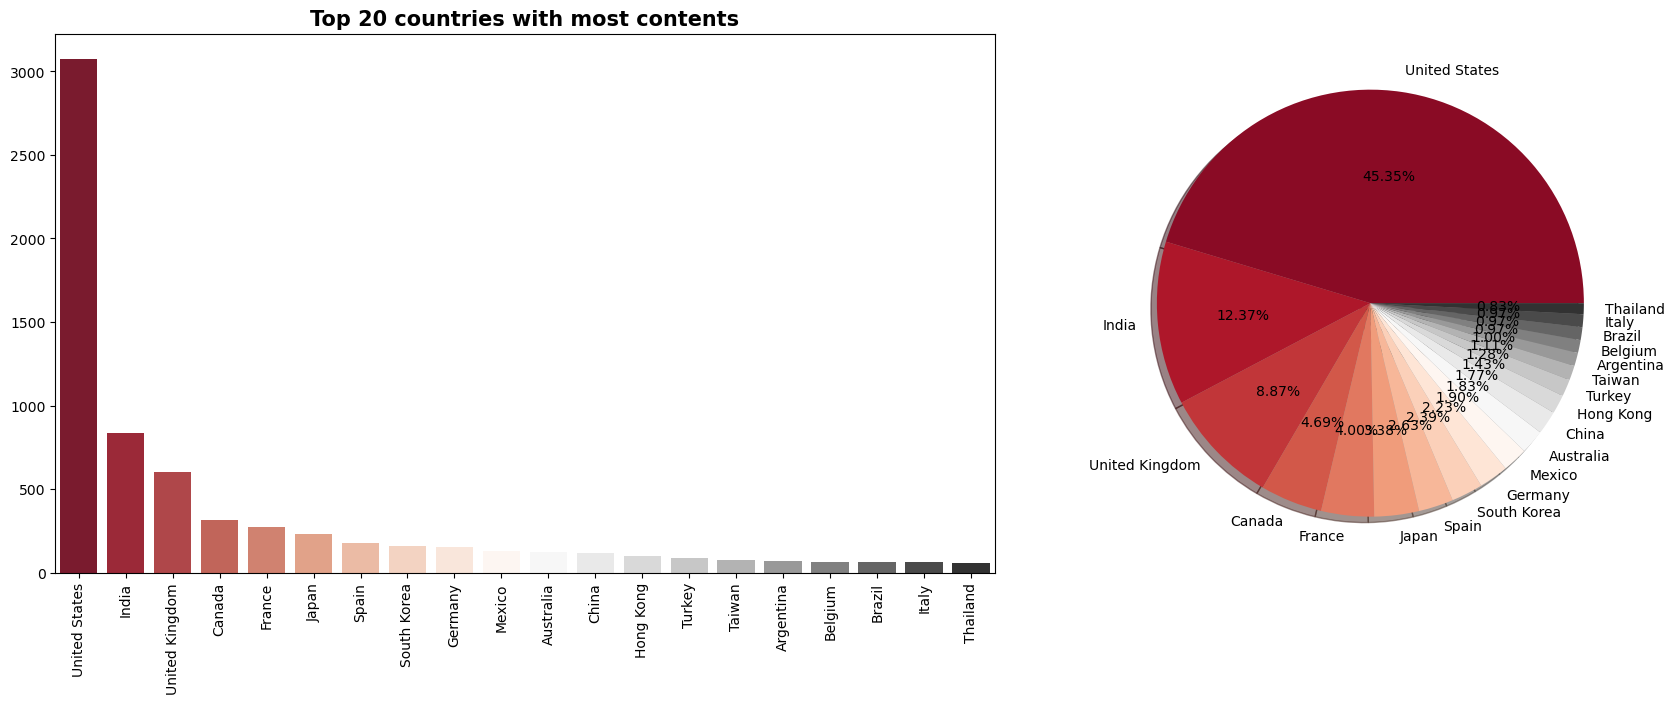

In [13]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 7))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(x=top20country.index, y=top20country, ax=ax, palette="RdGy")
ax.set_xticklabels(top20country.index, rotation=90)  # Rotate the tick labels
ax.set_title('Top 20 countries with most contents', fontsize=15, fontweight='bold')

ax2 = plt.subplot(gs[1])
ax2.pie(top20country, labels=top20country.index, shadow=True, startangle=0, colors=sns.color_palette("RdGy", n_colors=20),
       autopct='%1.2f%%')
ax2.axis('equal') 

plt.show()


In [14]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

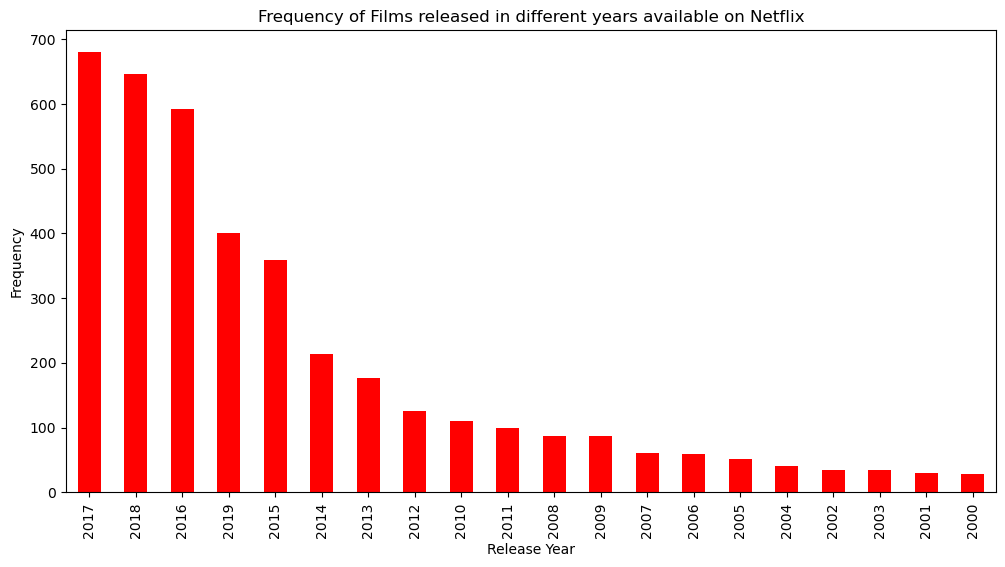

In [15]:
plt.figure(figsize=(12, 6)) 
df[df["type"] == "Movie"]["release_year"].value_counts()[:20].plot(kind="bar", color="red")  
plt.title("Frequency of Films released in different years available on Netflix") 
plt.xlabel("Release Year")  # Adding x-axis label
plt.ylabel("Frequency")  # Adding y-axis label
plt.show()

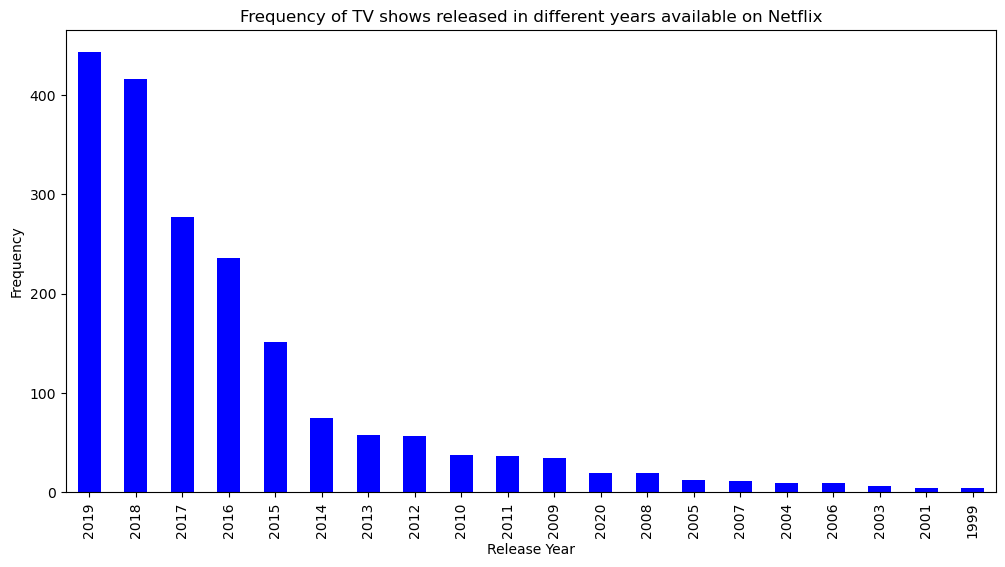

In [16]:
plt.figure(figsize=(12, 6))  # Corrected syntax for specifying figure size
df[df["type"] == "TV Show"]["release_year"].value_counts()[:20].plot(kind="bar", color="blue")  # Corrected syntax for specifying color
plt.title("Frequency of TV shows released in different years available on Netflix")  # Corrected title syntax
plt.xlabel("Release Year")  # Adding x-axis label
plt.ylabel("Frequency")  # Adding y-axis label
plt.show()


There are 20 types in the Netflix Movie Dataset


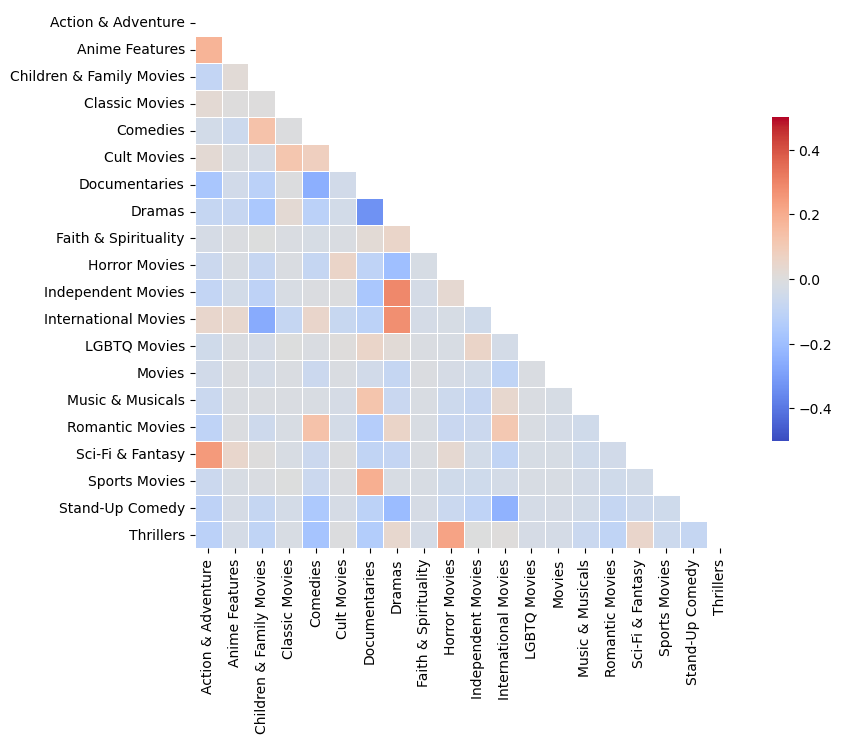

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer 
import seaborn as sns

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7,
                     cbar_kws={"shrink": 0.6})
    
    plt.show()

relation_heatmap(df_movies, 'Movie')

There are 22 types in the Netflix TV Show Dataset


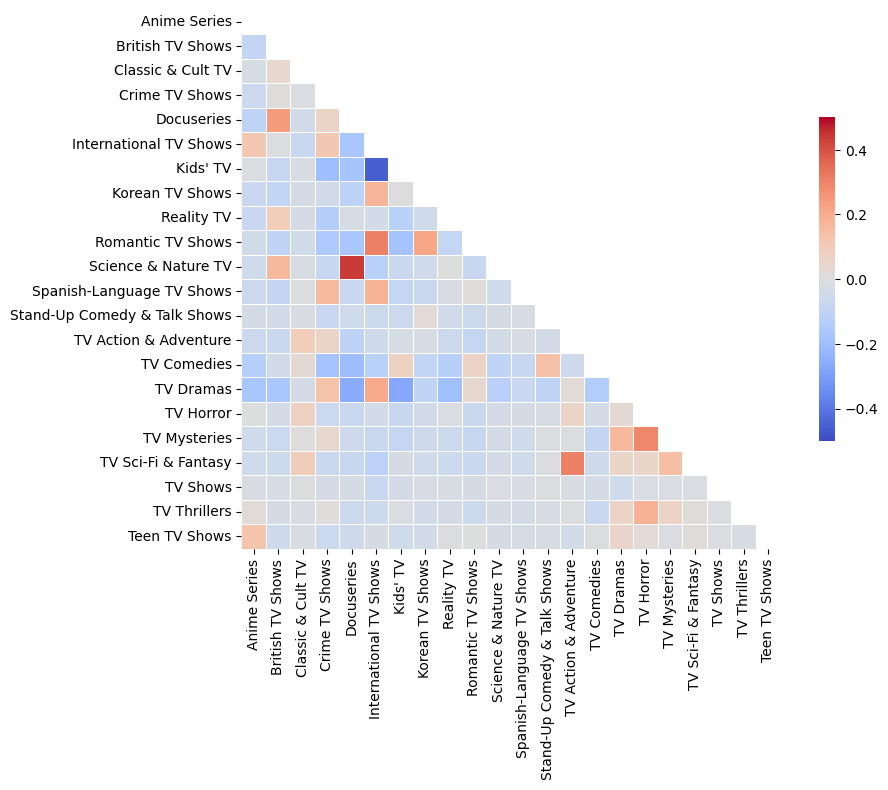

In [18]:
relation_heatmap(df_tv, 'TV Show')

In [19]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  ['G', 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']

In [20]:
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)

In [21]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

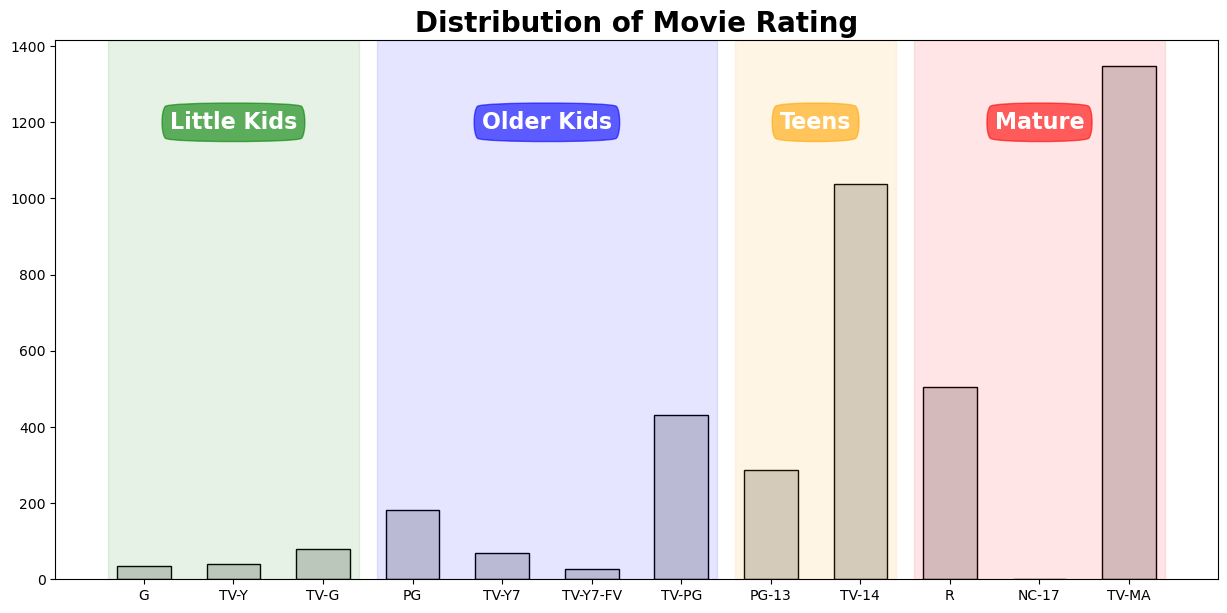

In [22]:
rating_barplot(movie_rating,'Movie', 1200)

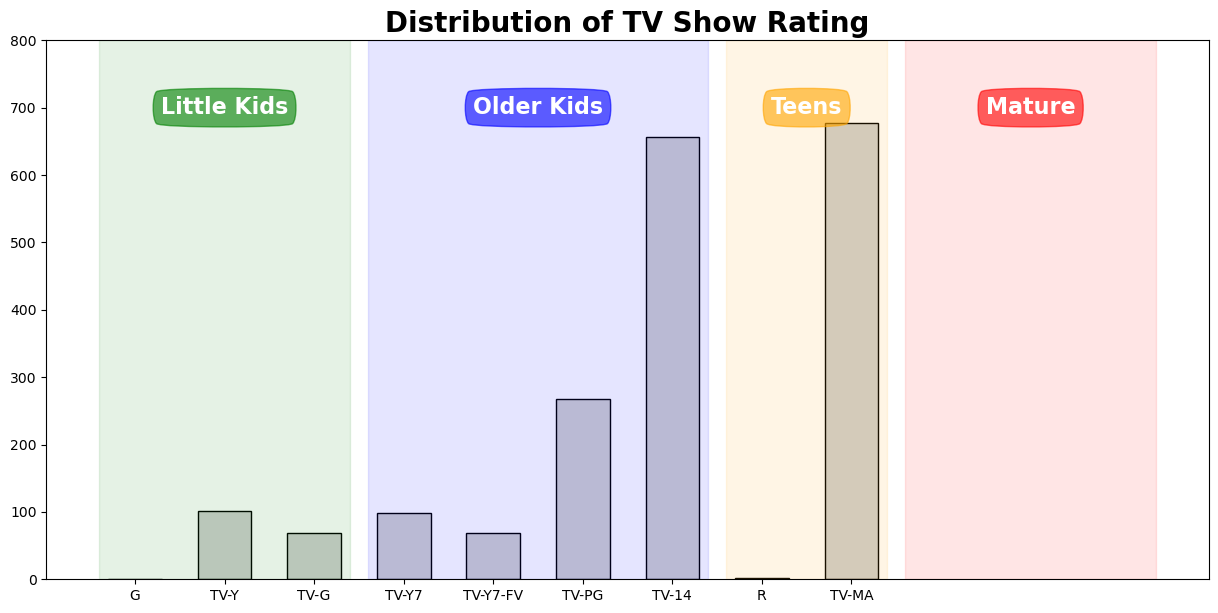

In [23]:
rating_barplot(tv_rating,'TV Show' , 700, 800)

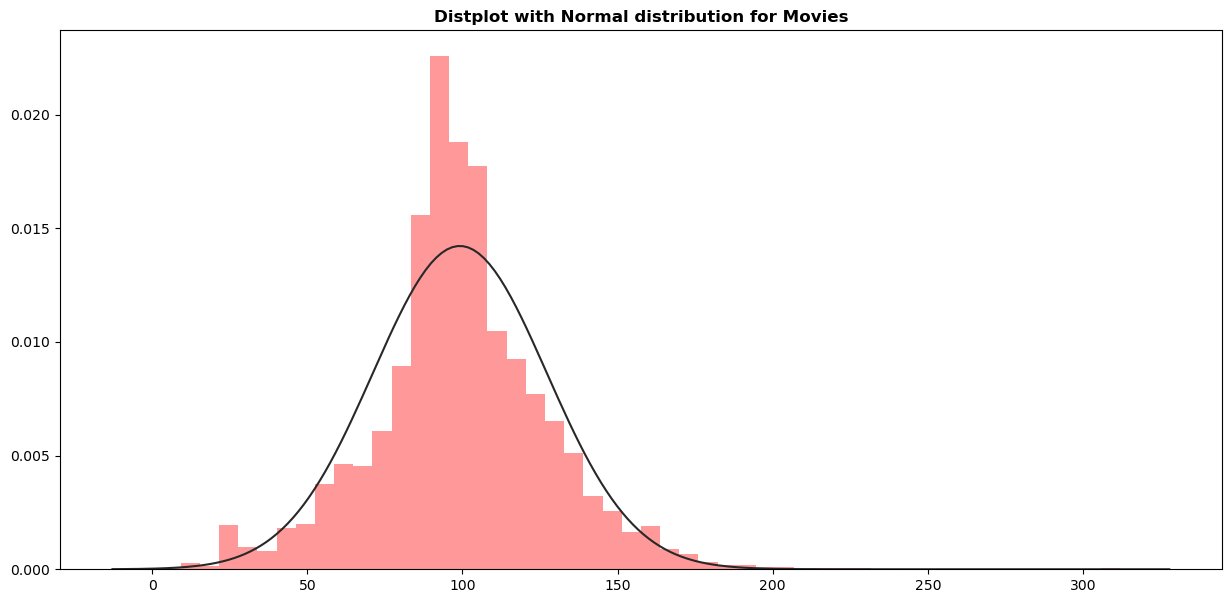

In [24]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False,color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

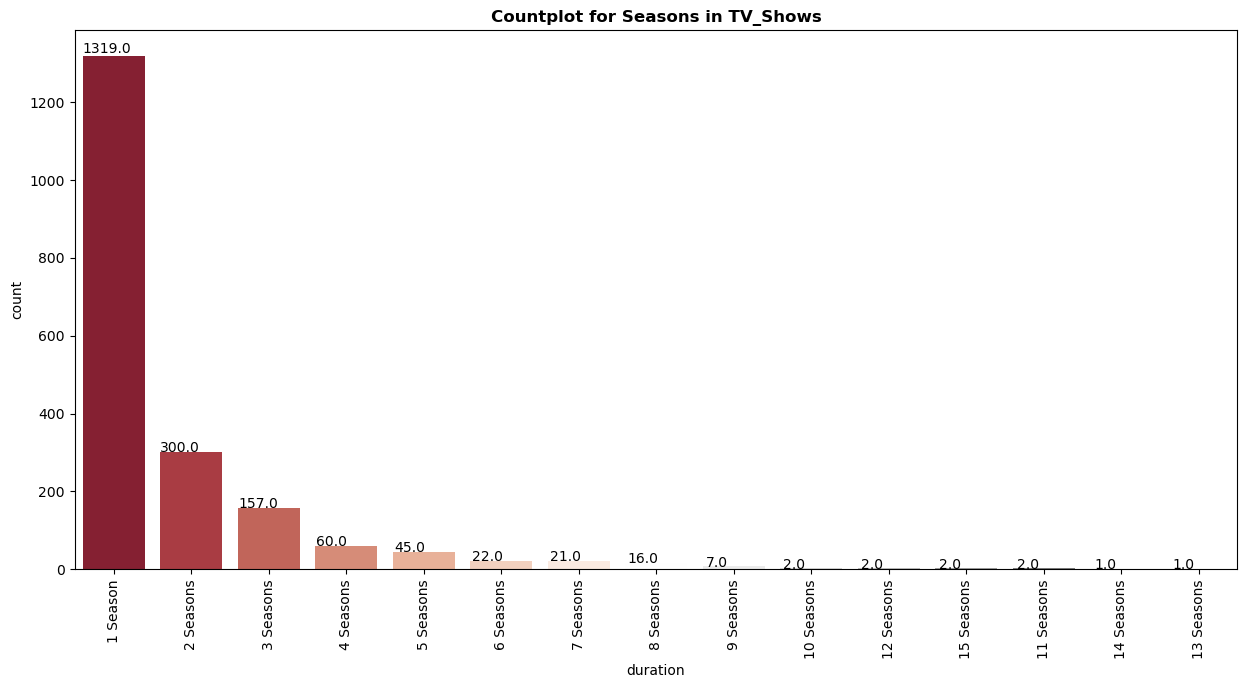

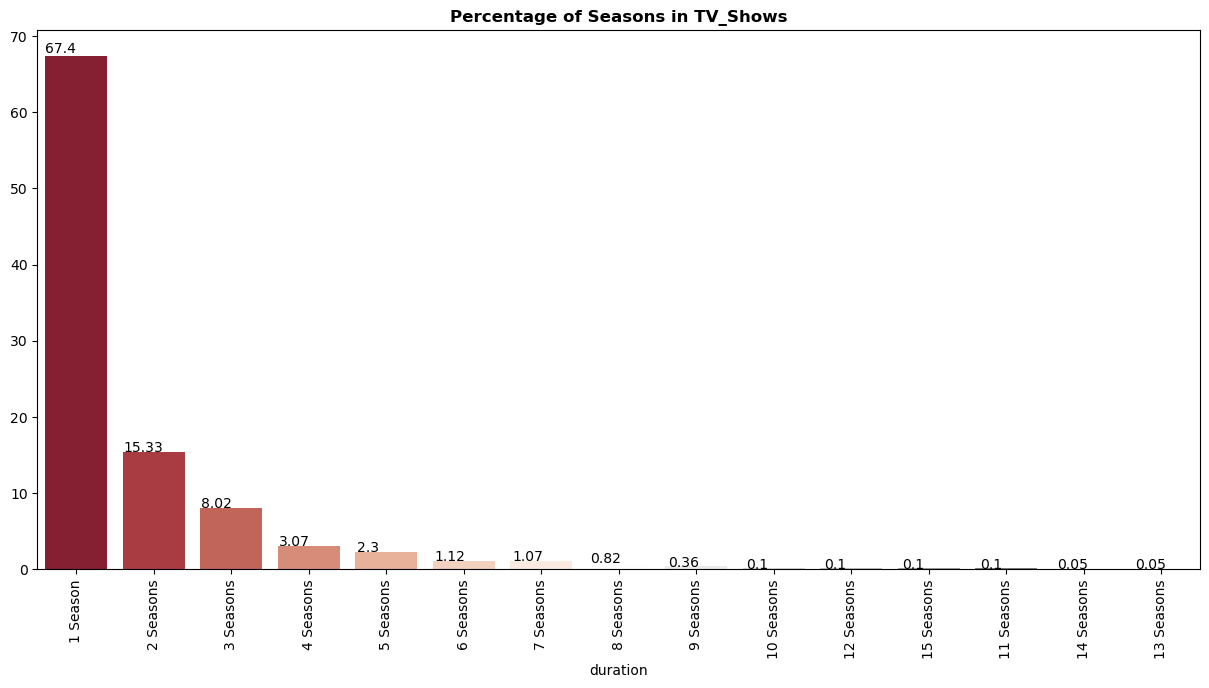

In [25]:
plt.figure(figsize=(15, 7))
order = df_tv['duration'].value_counts().index
ax = sns.countplot(data=df_tv, x='duration', order=order, palette="RdGy")
plt.title('Countplot for Seasons in TV_Shows', fontweight="bold")
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height() * 1.005)))

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=((df_tv['duration'].value_counts() / df_tv.shape[0]) * 100).index,
                 y=round(((df_tv['duration'].value_counts() / df_tv.shape[0]) * 100), 2).values,
                 palette="RdGy")
plt.title('Percentage of Seasons in TV_Shows', fontweight="bold")
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height() * 1.005)))
plt.show()


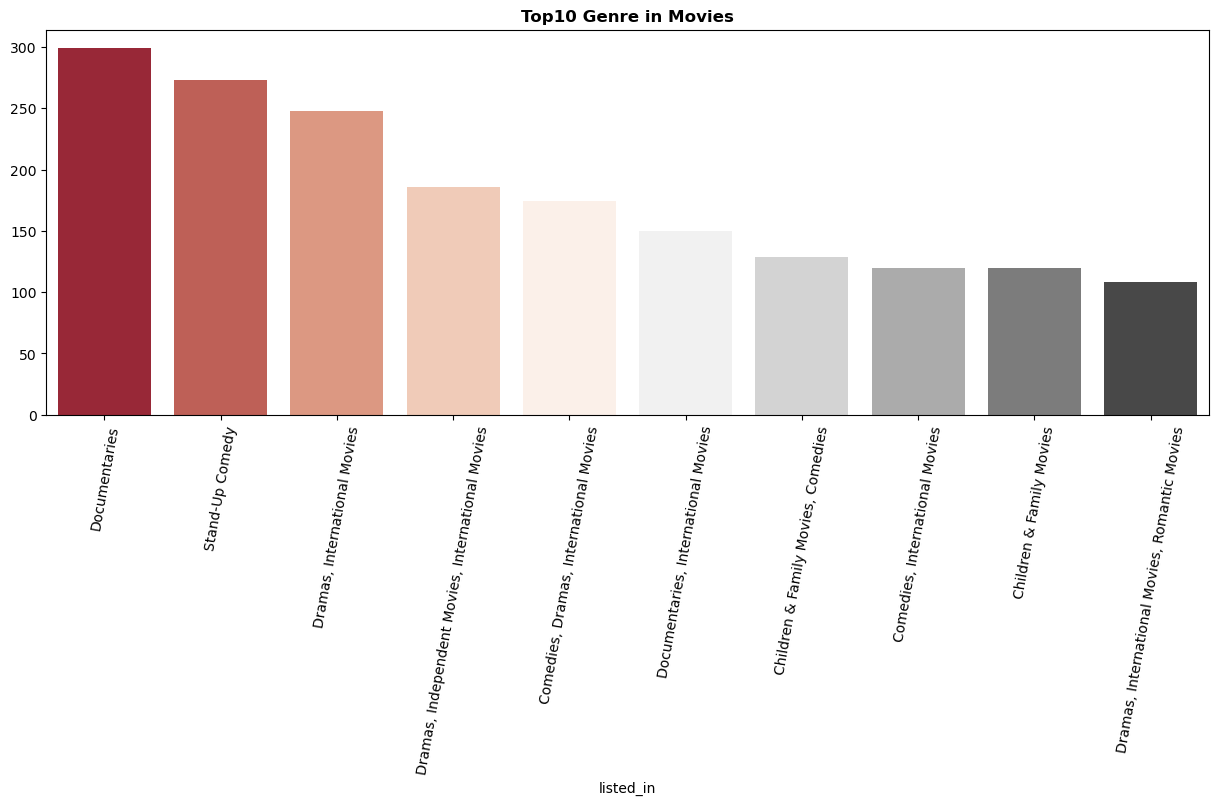

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

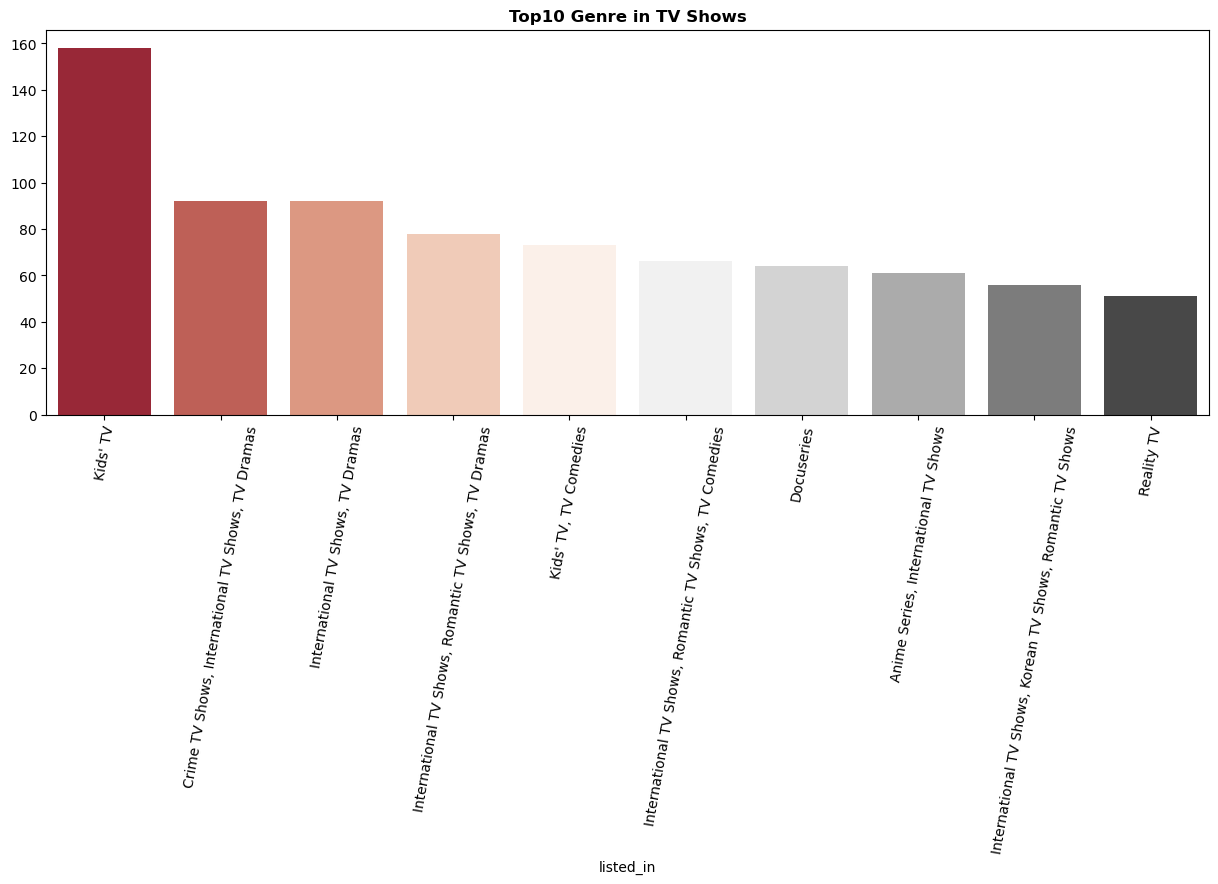

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xticks(rotation=80)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

In [28]:
df['cast_name'] = df['cast'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]

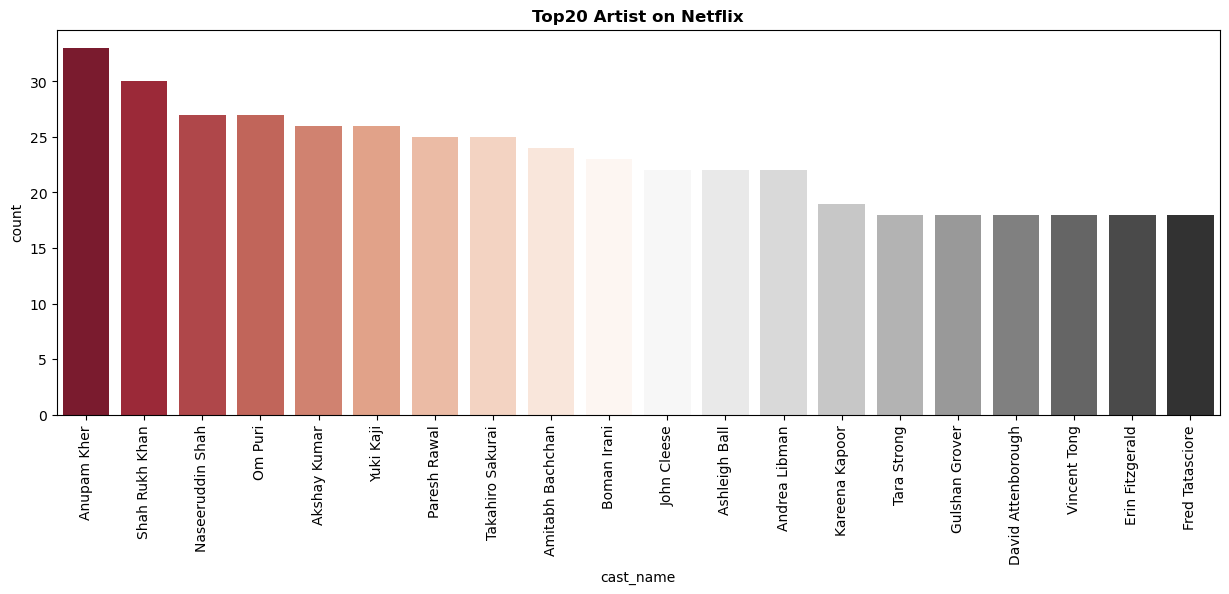

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="RdGy")
plt.title("Top20 Artist on Netflix",fontweight="bold")
plt.xticks(rotation=90)
plt.show()